### Import libraries.

In [18]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

### Create own Linear Regression class.

In [3]:
class MyLinearRegression:

    def __init__(self): 
        self.m = None 
        self.b = None

    def fit(self, X_train, y_train):
    
        num = 0
        deno = 0
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
            deno = deno + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

        self.m = num / deno
        self.b = y_train.mean() - (self.m * X_train.mean())

        print('Training is done.')


    def predict(self, X_test): 

        y_pred = np.array([])
        for i in range(len(X_test)): 
            predicted_value = self.m * X_test[i] + self.b
            y_pred = np.append(y_pred, predicted_value)
        
        return y_pred

In [4]:
data_df = pd.read_csv('./Datasets/placement.csv')

In [5]:
data_df.sample(5)

,cgpa,package
122,5.12,2.01
180,6.19,2.72
128,7.93,3.34
20,7.28,3.16
98,7.69,3.83


In [6]:
X = data_df.iloc[ : , 0 : 1].values
Y = data_df.iloc[ : , -1].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

#### Create an object of class.

In [8]:
lr = MyLinearRegression()

In [9]:
lr.fit(X_train, y_train)

Training is done.


In [23]:
y_pred = lr.predict(X_test)

In [24]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [25]:
r2_score(y_pred, y_test) 

0.6626575570753075

#### Visualization of my Linear Regression.

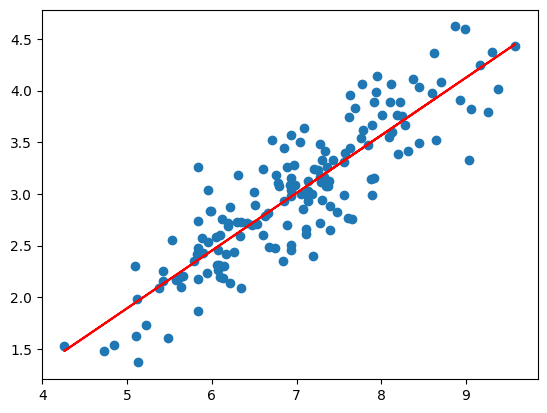

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), 'r')